In [1]:
!pip install imbalanced-learn

In [2]:
!pip install xgboost

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import  StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

In [4]:
data  = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning/Datasets/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.shape

(284807, 31)

In [6]:
data.isnull().sum().sum()


np.int64(0)

In [7]:
data['Class'].unique()

array([0, 1])

In [8]:
data['Class'].value_counts()

,count
Class,
0,284315
1,492


In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


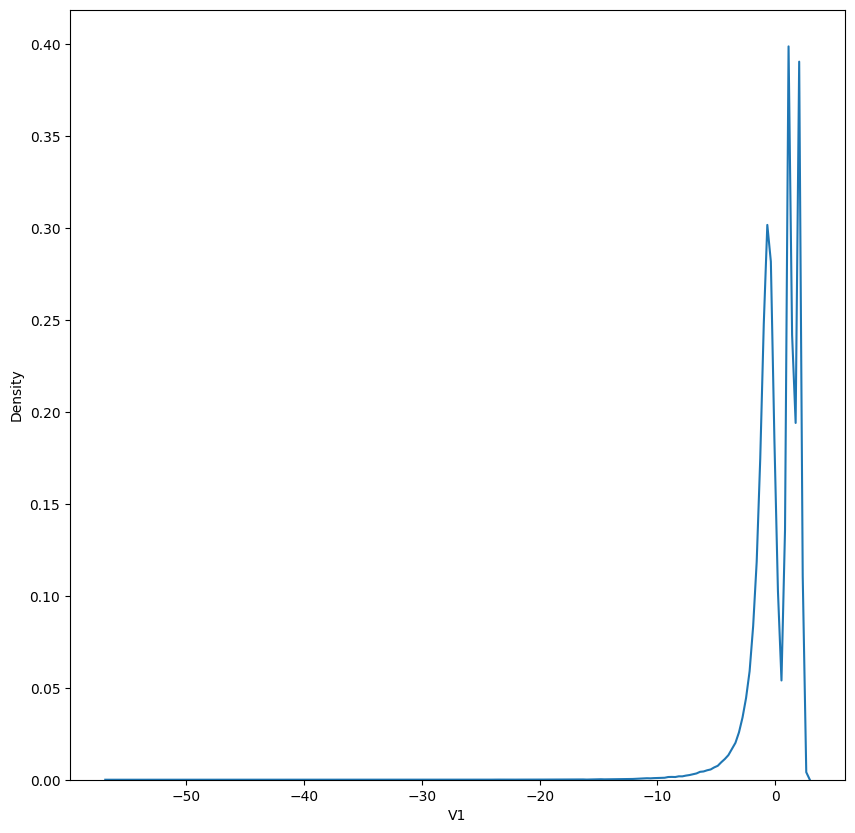

In [10]:
plt.figure(figsize = (10,10))
sns.kdeplot(data['V1'])
plt.show()

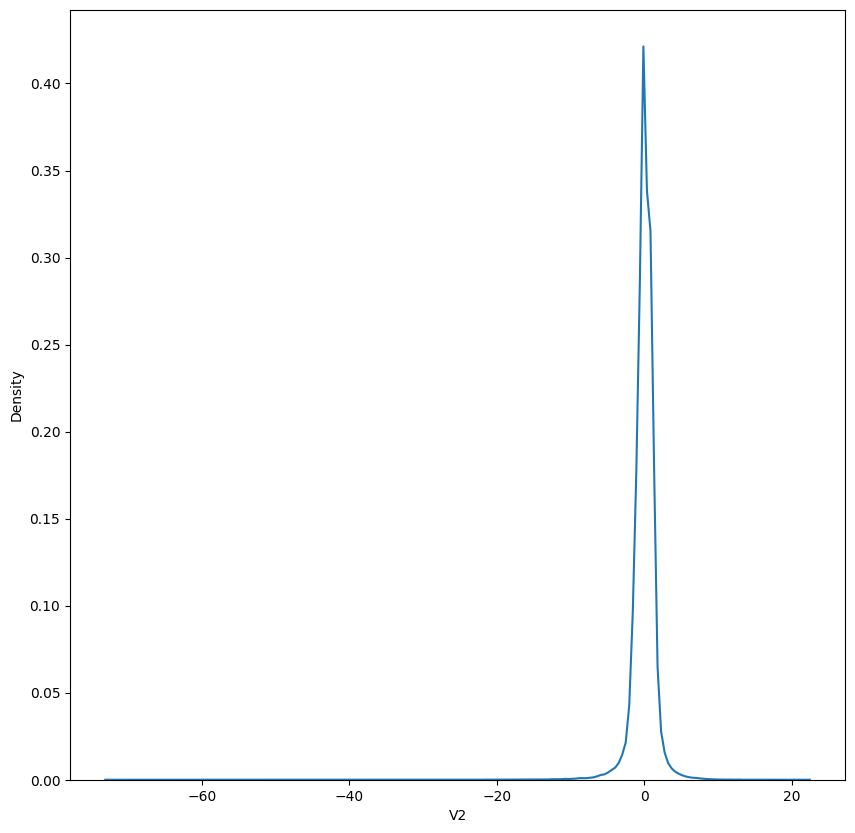

In [11]:
plt.figure(figsize = (10,10))
sns.kdeplot(data['V2'])
plt.show()

In [12]:
x = data.drop('Class',axis = 1)
y = data['Class']

In [13]:
# train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state = 42)

In [14]:
# smote sampling
x_train_smote,y_train_smote = SMOTE(random_state = 42).fit_resample(x_train,y_train)

In [15]:
# scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_smote)
x_test_scaled = scaler.transform(x_test)

x_train_scaled = pd.DataFrame(x_train_scaled, columns = x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns = x_test.columns)

x_train_scaled

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,1.159997,0.830117,-0.651074,0.546277,-0.637192,0.262856,0.388831,0.402723,-0.075962,1.079798,...,-0.307005,-0.060682,0.930435,0.080521,-0.419775,-0.099788,-0.556014,-0.047975,-0.226661,-0.382025
1,0.618522,0.368526,-0.723447,0.865849,-1.390147,0.365099,0.543696,0.523096,-0.177264,0.617065,...,-0.669172,-0.222274,0.404766,0.141708,-1.760366,-1.931240,0.735910,-0.503865,-0.467334,-0.219953
2,1.288504,0.461291,-0.297869,0.504187,-0.970725,0.667589,0.222573,0.666569,-0.057146,0.538746,...,-0.162533,-0.288760,-0.840314,0.111182,0.368843,-0.725205,0.195136,0.128866,0.062779,-0.372998
3,0.132396,0.342259,-0.240825,0.899225,0.145044,0.519850,1.051150,0.677759,-0.103120,0.768180,...,-0.441767,-0.132745,0.425662,-0.047433,0.923219,-1.087295,-0.476222,-0.199539,-0.270500,0.102926
4,-0.095434,-0.341874,0.018720,0.526667,-0.752552,0.174674,0.148961,0.438567,0.219825,0.843219,...,-0.188302,-0.357267,-0.222333,0.281155,0.217729,0.734922,0.475633,0.217172,-0.905761,-0.310850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454897,0.175582,-2.448928,2.745427,-2.140281,2.562155,-2.491120,0.530019,-3.274239,-1.620329,-2.822754,...,2.739203,-2.267339,1.227249,1.720194,0.395401,-1.160657,-0.311922,-2.757593,-0.978434,-0.391485
454898,-1.546720,-0.318797,0.454271,0.176358,0.447532,-0.220490,0.432126,0.092087,-0.622221,1.512705,...,-0.497138,0.554678,-0.022532,0.303186,0.677061,-1.088152,-0.725034,-2.787451,-1.273455,0.278279
454899,-1.189244,0.575952,-0.054697,-0.095587,0.342128,0.095718,-0.351194,0.036968,0.127188,0.135105,...,0.063634,0.123605,0.718420,0.236475,-0.102161,-0.863393,-0.270076,0.467523,0.220135,-0.344723
454900,-0.092766,0.268509,0.232473,-0.029925,0.665170,-0.088063,-0.196401,-0.288683,0.226235,-0.909573,...,0.610640,0.214786,0.014687,-0.153325,-0.804791,0.276005,1.515202,0.932933,1.004902,-0.409981


In [16]:
# model training
model = LogisticRegression()
model.fit(x_train_scaled, y_train_smote)

print('trainig score: ',round(model.score(x_train_scaled,y_train_smote),2)*100)

pred = model.predict(x_test_scaled)
print('testing score: ',round(accuracy_score(y_test, pred),2)*100)

trainig score:  98.0
testing score:  99.0


Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.16      0.92      0.28        98

    accuracy                           0.99     56962
   macro avg       0.58      0.96      0.64     56962
weighted avg       1.00      0.99      0.99     56962
 




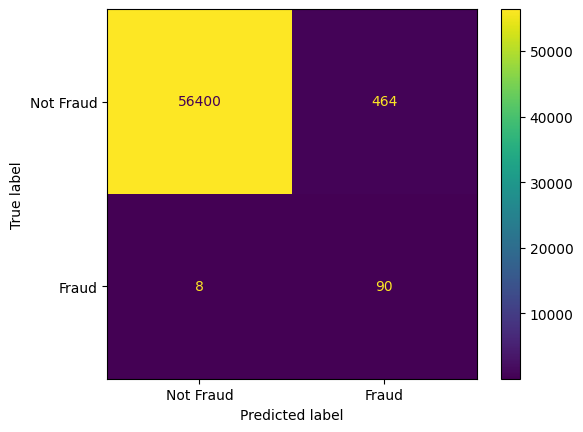

In [17]:
# confusion_matrix
print(f'Classification Report:\n\n{classification_report(y_test,pred)} \n\n')
cm = ConfusionMatrixDisplay.from_predictions(y_test,pred, display_labels = ['Not Fraud','Fraud'])
plt.show()

In [18]:
# plt.figure(figsize = (20,20))
# sns.heatmap(x_train_scaled.corr(),annot = True)
# plt.show()

In [23]:
model_rf = RandomForestClassifier(random_state = 42, n_jobs = -1, verbose=3)
model_rf.fit(x_train_scaled, y_train_smote)
print('Training score: ',round(model_rf.score(x_train_scaled,y_train_smote)*100,2))
pred_rf = model_rf.predict(x_test_scaled)
print('Testing score: ',round(accuracy_score(y_test,pred_rf)*100,2))


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  2.0min


building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  6.9min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    1.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    4.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


Training score:  100.0


[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.3s


Testing score:  99.95


[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.9s finished


Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.85      0.86        98

    accuracy                           1.00     56962
   macro avg       0.93      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962
 




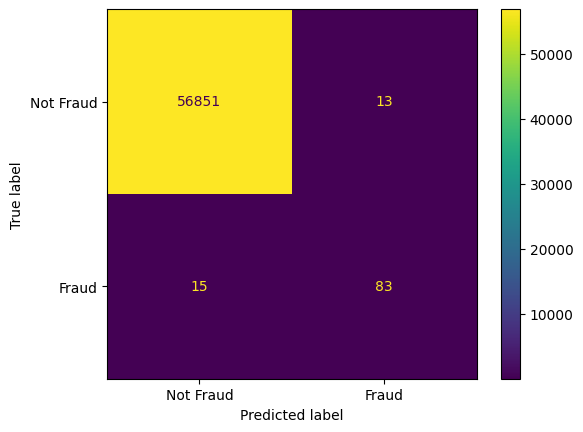

In [25]:
# confusion_matrix
print('Classification Report:\n\n',classification_report(y_test,pred_rf) ,'\n\n')
cm = ConfusionMatrixDisplay.from_predictions(y_test,pred_rf, display_labels = ['Not Fraud','Fraud'])
plt.show() # FPR reduced by 70%

In [22]:
# hyperparameter tuning random forest
param_grid = [
    {'criterion': ['gini','entropy', 'log_loss']},
    {'max_features':['sqrt', 'log2', None]},
    {'oob_score':[True]},
    {'warm_start':[True,False]}
]
tuner = RandomizedSearchCV(model_rf,param_grid,n_jobs =-1, random_state = 42)
tuner.fit(x_train_scaled,y_train_smote)

best_params = tuner.best_params_
print(best_params)


KeyboardInterrupt: 

In [ ]:
model_rf2 = RandomForestClassifier(random_state = 42, **best_params, n_jobs = -1)
model_rf2.fit(x_train_scaled, y_train_smote)
print('Training score: ', round(model_rf2.score(x_train_scaled, y_train_smote)))
pred_rf2 = model_rf2.predict(x_test_scaled)
print('Testing score: ', round(accuracy_score(y_test,pred_rf2)))

In [ ]:
# confusion_matrix
print('Classification Report:\n\n',classification_report(y_test,pred_rf2) ,'\n\n')
cm = ConfusionMatrixDisplay.from_predictions(y_test,pred_rf2, display_labels = ['Not Fraud','Fraud'])
plt.show()

In [ ]:
xgb = XGBClassifier(random_state = 42,learning_rate = 1)
xgb.fit(x_train_scaled,y_train_smote)
print('Training score: ', round(xgb.score(x_train_scaled,y_train_smote)*100,2))
pred_xgb = xgb.predict(x_test_scaled)
print('Testing score: ', round(accuracy_score(y_test,pred_xgb)*100,2))

In [ ]:
# confusion_matrix
print('Classification Report:\n\n',classification_report(y_test,pred_xgb) ,'\n\n')
cm = ConfusionMatrixDisplay.from_predictions(y_test,pred_xgb, display_labels = ['Not Fraud','Fraud'])
plt.show()